In [1]:
# Import bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore") 


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# import Dataframe
df_dados = pd.read_excel("dados_credito.xlsx")

In [3]:
# visualizar o Shape da tabela
df_dados.shape

(4000, 17)

In [4]:
# visualizar as colunas e linhas da tabela  
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,0,8,Sim,1800,0,0,56.000000,SIM
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,0,9,Não,4800,1,50000,18.000000,NAO
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,0,18,Sim,2200,2,30000,45.000000,SIM
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,0,22,Não,3900,0,0,28.666667,NAO
4,6,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,0,14,Sim,3100,2,40000,39.666667,SIM


In [5]:
# analisar ultimas linhas para ver se tem erros 
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
3995,3998,MG,28,Superior Cursando,Casado,3,Sim,1,450000,3200,93,Não,5300,0,0,94.666667,NAO
3996,3999,SC,30,Superior Completo,Viuvo,1,Não,3,900000,0,150,Não,18300,1,80000,98.000000,SIM
3997,4000,PR,32,Superior Cursando,Solteiro,0,Não,0,0,0,8,Sim,1800,0,0,12.000000,NAO
3998,4001,RJ,35,Superior Completo,Solteiro,1,Não,0,0,0,9,Não,4800,1,50000,82.035714,SIM
3999,4002,SP,42,Segundo Grau Completo,Casado,0,Sim,1,220000,0,18,Sim,2200,2,30000,23.000000,NAO


In [6]:
# analisar informações da colunas 
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              4000 non-null   int64  
 1   UF                          4000 non-null   object 
 2   IDADE                       4000 non-null   int64  
 3   ESCOLARIDADE                4000 non-null   object 
 4   ESTADO_CIVIL                4000 non-null   object 
 5   QT_FILHOS                   4000 non-null   int64  
 6   CASA_PROPRIA                4000 non-null   object 
 7   QT_IMOVEIS                  4000 non-null   int64  
 8   VL_IMOVEIS                  4000 non-null   int64  
 9   OUTRA_RENDA_VALOR           4000 non-null   int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 11  TRABALHANDO_ATUALMENTE      4000 non-null   object 
 12  ULTIMO_SALARIO              4000 non-null   int64  
 13  QT_CARROS                   4000 

In [7]:
# excluindo uma coluna que ja vi que nao vou usar 
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [9]:
# verificar valores nulos
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE_CREDITO                 0
EMPRESTIMO                    0
dtype: int64

In [10]:
# analisar descrição estatistica da tabela 
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,41.006500,1.116000,0.848250,238716.250000,643.650000,43.142750,8293.27500,0.936000,41023.000000,60.241018
std,13.905891,0.975593,0.958098,266010.406037,1297.939074,40.893911,5829.10258,0.806887,47461.411877,25.672385
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.00000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.00000,0.000000,0.000000,39.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.00000,1.000000,35000.000000,61.666667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.00000,2.000000,50000.000000,83.666667
max,65.000000,3.000000,3.000000,900000.000000,4000.000000,150.000000,22000.00000,2.000000,180000.000000,98.000000


In [11]:
# listando as colunas INT E FLOAT para analisar possiveis  OUTLIERS
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : int64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE_CREDITO : float64


In [12]:
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE_CREDITO']

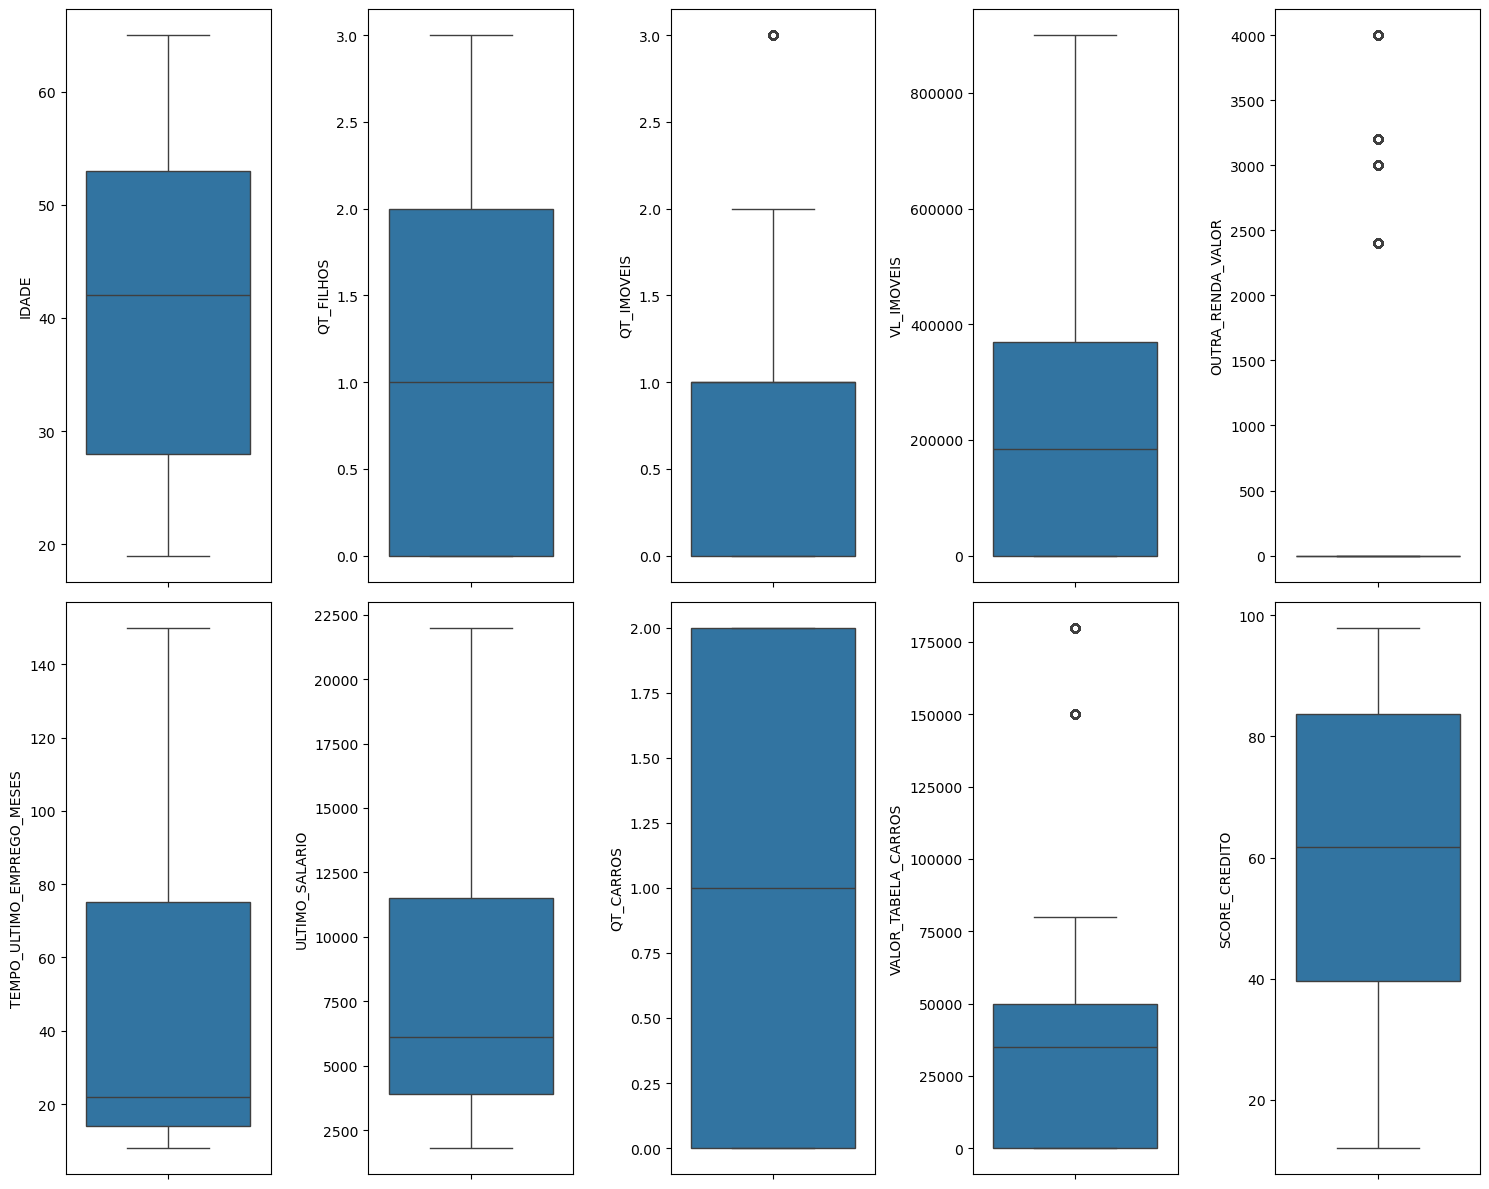

In [13]:
# analisar OUTLIERS no grafico 
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 5) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [14]:
# avaliar variaveis com possiveis outliers

In [15]:
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       3186
2400     179
3000     235
3200     200
4000     200
dtype: int64

In [16]:
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         1438
28000      179
30000      302
35000      300
40000      301
48000      200
50000      502
70000      199
80000      200
150000     179
180000     200
dtype: int64

In [17]:
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    1785
1    1437
2     378
3     400
dtype: int64

In [19]:
# listar as colunas OBJ E CAT para analise
variaveis_categoricas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_categoricas.append(i)           


UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
TRABALHANDO_ATUALMENTE : object
EMPRESTIMO : object


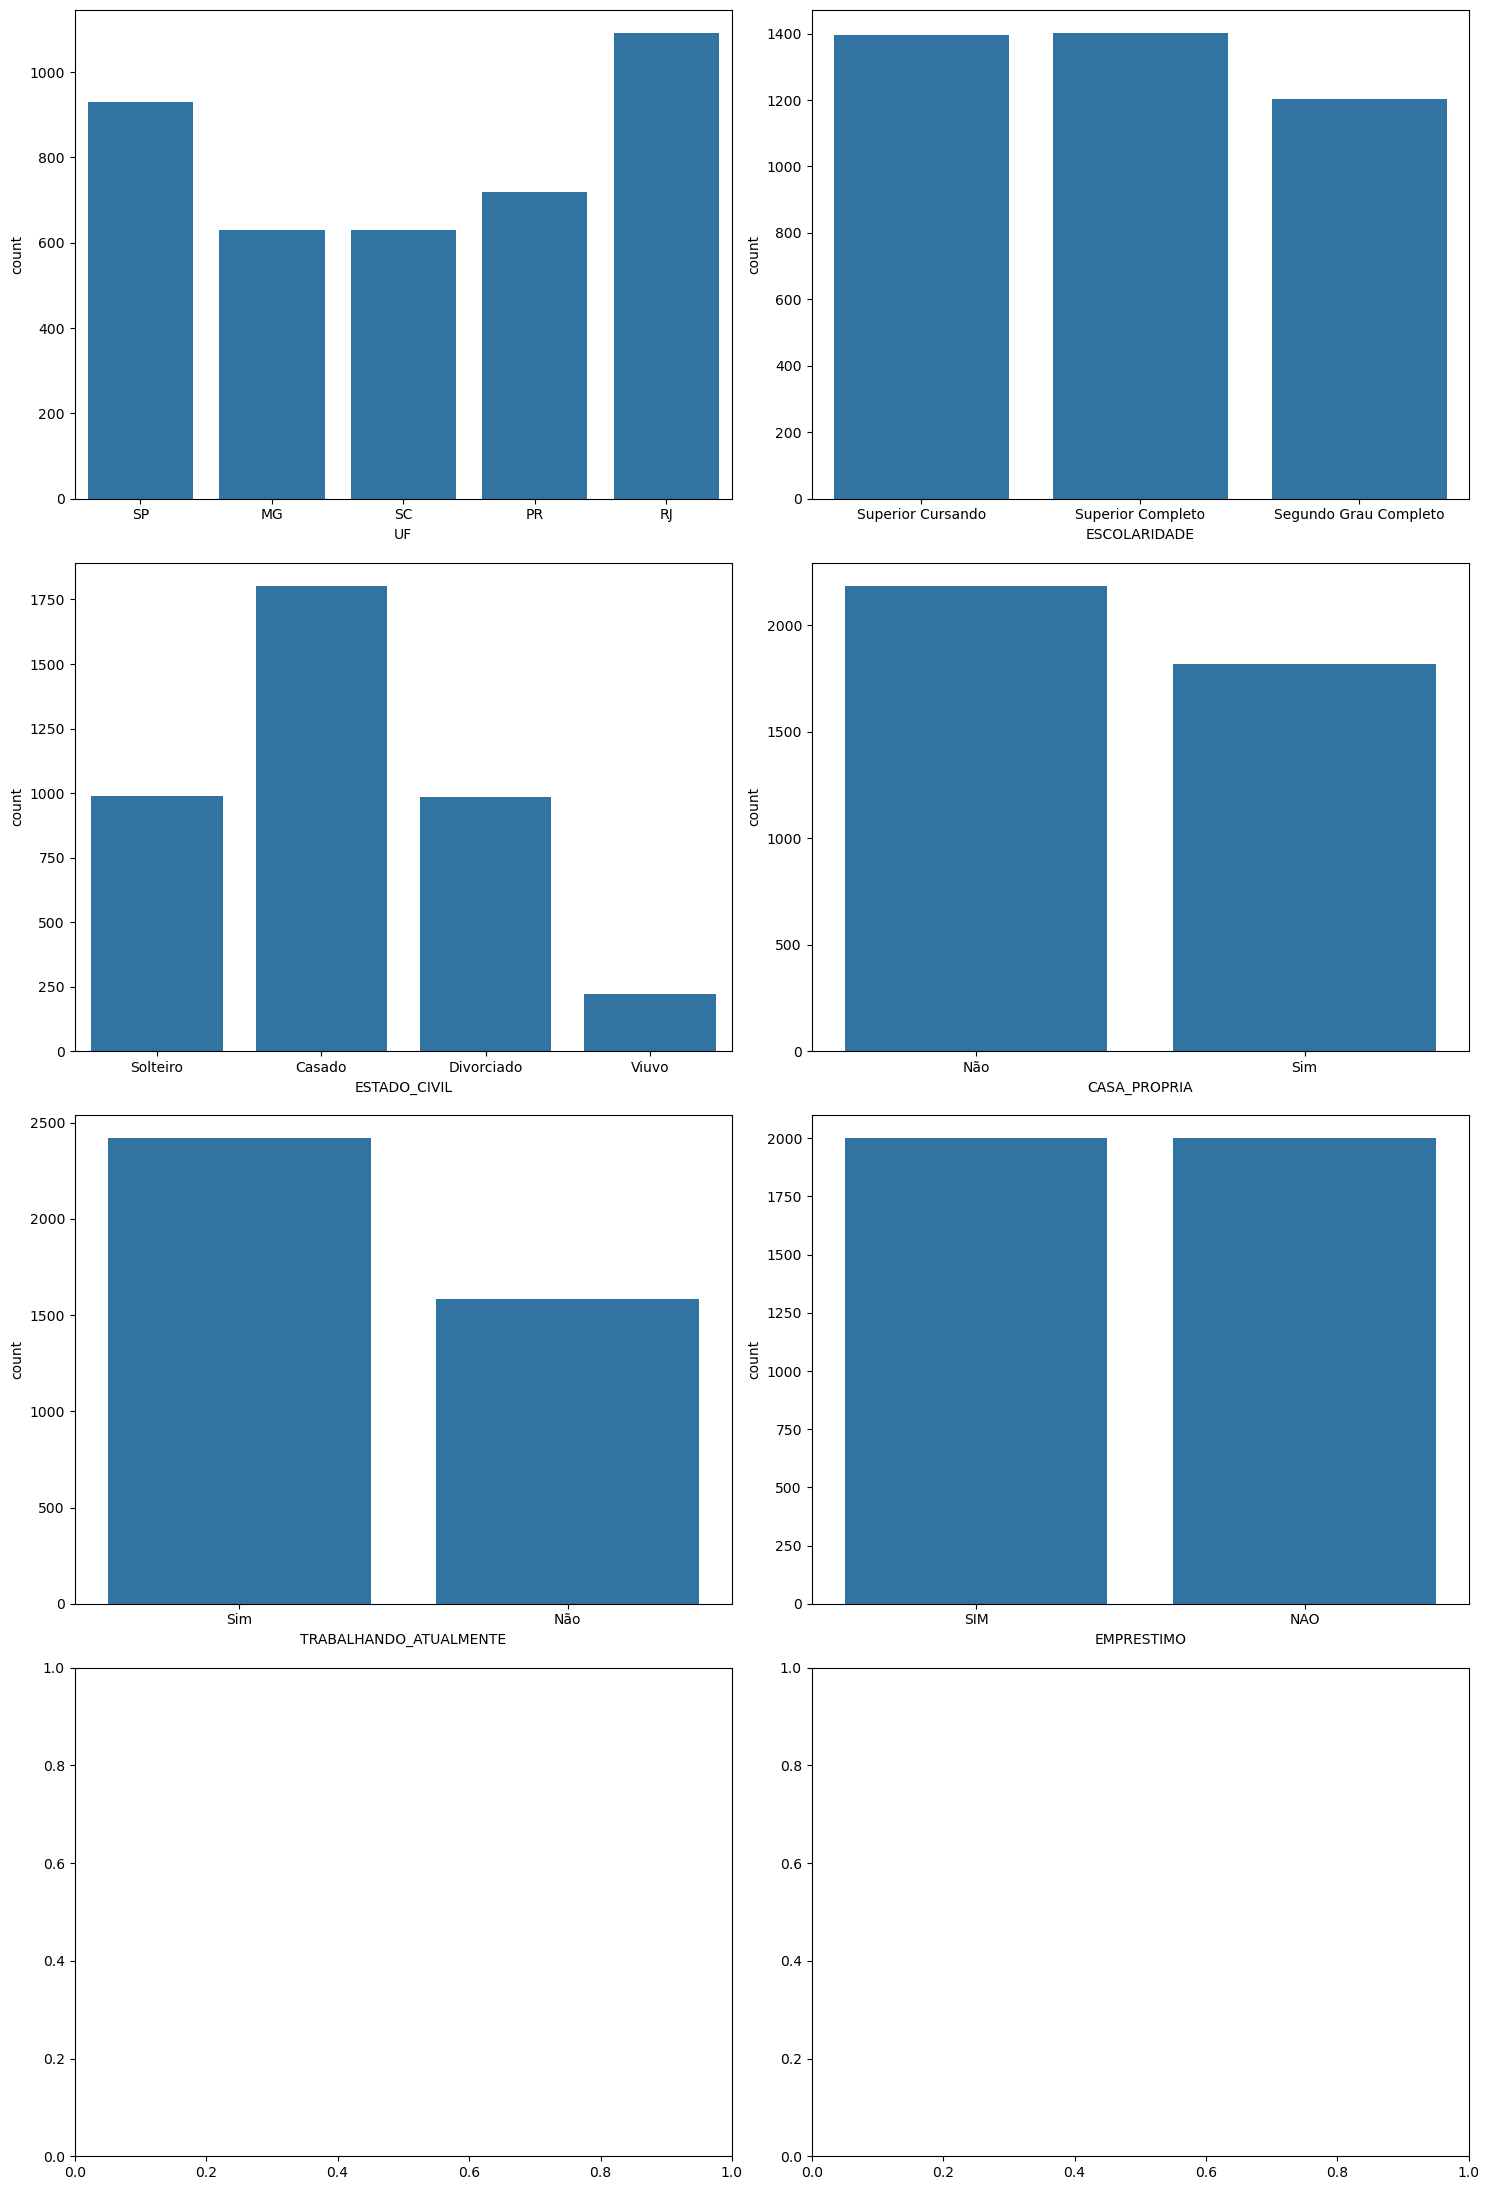

In [20]:
# analisar colunas em grafico 
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:    
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

## Pré Processamento dos Dados

In [21]:
# modificar colunas STRING para NUMERICAS 
lb = LabelEncoder()

df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

In [25]:
df_dados.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000,SIM
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000,NAO
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000,SIM
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667,NAO
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667,SIM
5,0,32,2,2,1,1,1,185000,3000,19,1,6800,0,0,45.166667,NAO
6,3,35,1,2,1,1,2,450000,2400,25,1,22000,1,150000,50.666667,SIM
7,1,42,0,0,0,0,0,0,0,48,1,4500,2,28000,56.166667,NAO
8,2,45,2,0,0,0,0,0,0,120,0,9800,0,0,61.666667,SIM
9,4,48,1,1,2,1,2,600000,0,15,1,15000,1,70000,67.166667,NAO


In [26]:
# remover os valores missing gerados
df_dados.dropna(inplace = True)

In [27]:
df_dados.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000,SIM
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000,NAO
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000,SIM
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667,NAO
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667,SIM
5,0,32,2,2,1,1,1,185000,3000,19,1,6800,0,0,45.166667,NAO
6,3,35,1,2,1,1,2,450000,2400,25,1,22000,1,150000,50.666667,SIM
7,1,42,0,0,0,0,0,0,0,48,1,4500,2,28000,56.166667,NAO
8,2,45,2,0,0,0,0,0,0,120,0,9800,0,0,61.666667,SIM
9,4,48,1,1,2,1,2,600000,0,15,1,15000,1,70000,67.166667,NAO


In [29]:
# verificar se esta tudo como numerica
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          4000 non-null   int32  
 1   IDADE                       4000 non-null   int64  
 2   ESCOLARIDADE                4000 non-null   int32  
 3   ESTADO_CIVIL                4000 non-null   int32  
 4   QT_FILHOS                   4000 non-null   int64  
 5   CASA_PROPRIA                4000 non-null   int32  
 6   QT_IMOVEIS                  4000 non-null   int64  
 7   VL_IMOVEIS                  4000 non-null   int64  
 8   OUTRA_RENDA_VALOR           4000 non-null   int64  
 9   TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 10  TRABALHANDO_ATUALMENTE      4000 non-null   int32  
 11  ULTIMO_SALARIO              4000 non-null   int64  
 12  QT_CARROS                   4000 non-null   int64  
 13  VALOR_TABELA_CARROS         4000 

In [30]:
# separando a variavel alvo
target = df_dados.iloc[:,15]

In [31]:
target.head()

0    SIM
1    NAO
2    SIM
3    NAO
4    SIM
Name: EMPRESTIMO, dtype: object

In [32]:
# fazendo uma copia do DataFrame para nao perder as modificações ja feitas 
# separando as variaveis preditoras
preditoras = df_dados.copy() 

del preditoras['EMPRESTIMO'] 


In [33]:
preditoras.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667


In [34]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 33)

In [35]:
# normalização e Padronização em treino e teste
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

In [36]:
# Construção do Modelo
clf = RandomForestClassifier()

In [37]:
# visualiza os Hiperparametros do modelo tem 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Definir em variaveis os hiperparametros
n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array(["True","False"])

# Adicionar hiperparâmetros em um dicionario
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       bootstrap = bootstrap)

# Criando o modelo com o Grid de Hiperparametros
clf = GridSearchCV(clf, grid_parametros, cv = 3, n_jobs=1)

In [48]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 300, criterion = 'gini', max_depth = 20, max_features = None,
                              min_samples_leaf = 1, min_samples_split = 5, bootstrap = True)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, y_treino)

In [51]:
# Score treino
scores = clf.score(X_treino_normalizados,y_treino)
scores

0.8753571428571428

In [52]:
# Score teste
scores = clf.score(X_teste_normalizados,y_teste)
scores

0.8141666666666667

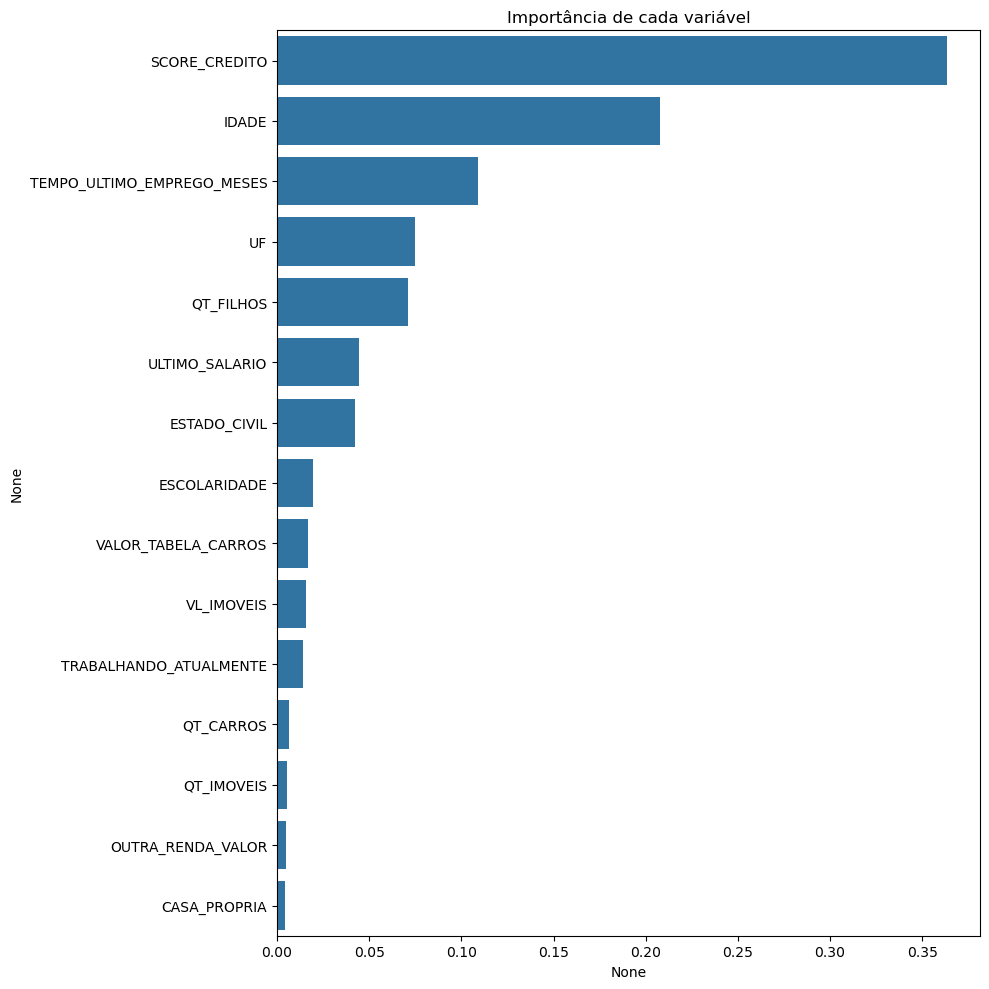

In [53]:
# Visualizar em grafico a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [54]:
# Visualização em números 
importances.sort_values(ascending = False)

SCORE_CREDITO                 0.363211
IDADE                         0.208035
TEMPO_ULTIMO_EMPREGO_MESES    0.108842
UF                            0.075092
QT_FILHOS                     0.071161
ULTIMO_SALARIO                0.044403
ESTADO_CIVIL                  0.042377
ESCOLARIDADE                  0.019534
VALOR_TABELA_CARROS           0.016629
VL_IMOVEIS                    0.015802
TRABALHANDO_ATUALMENTE        0.014030
QT_CARROS                     0.006383
QT_IMOVEIS                    0.005270
OUTRA_RENDA_VALOR             0.005008
CASA_PROPRIA                  0.004223
dtype: float64